In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

#### 正規分布 $N[0,5^2]$ からの 10,000 点 無作為抽出結果 

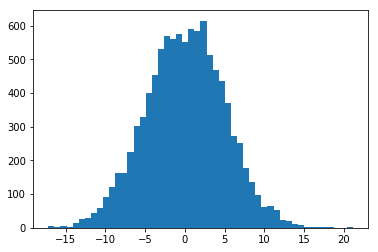

In [2]:
# 実行毎にサンプルを取り直す
a = np.random.normal(0, 5, 10000)
plt.hist(a,50);

In [3]:
p_mean = np.mean(a)
p_var = np.var(a, ddof=0)  #ddof=0: 標本分散（nで割る）
print(f"母平均: {p_mean:5.3f} / 母分散: {p_var:5.3f}")

母平均: 0.049 / 母分散: 24.565


In [4]:
# 標本抽出（手動で何度か実行せよ）
sample_num = 5
sample = np.random.choice(a,sample_num)
print(sample)
print("mean:",np.mean(sample))

[-1.55033973  0.30271246 -2.48816118 -6.48364247 -1.71941389]
mean: -2.3877689611312554


In [5]:
# 標本抽出
sample_1=[]; sample_2=[]

for k in range(1000000):
    sample = np.random.choice(a,5)
    sample_1.append(np.var(sample, ddof=0))
    sample = np.random.choice(a,100)
    sample_2.append(np.var(sample, ddof=0))

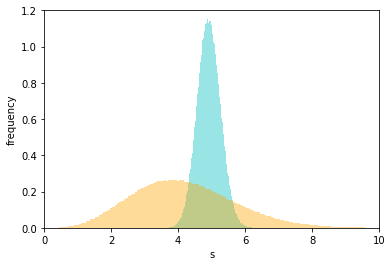

In [6]:
foo = np.vstack((sample_1,sample_2)).T
# 標本分散のヒストグラム（シアン）
plt.hist(np.sqrt(foo[:,1]), bins=200, density=True, color="c", alpha=0.4)
# 不偏分散のヒストグラム（orange）
plt.hist(np.sqrt(foo[:,0]), bins=200, density=True, color="orange", alpha=0.4)
plt.xlabel("s")
plt.ylabel("frequency")

plt.axis([0,10, 0, 1.2]);  #[Xmin, Xmax, Ymin, Ymax]

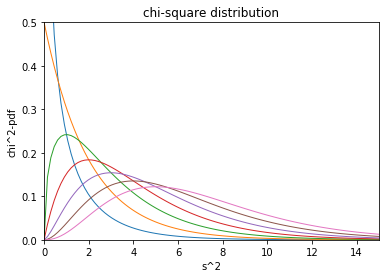

In [7]:
from scipy.stats import chi2
from scipy.stats import chisquare

x = np.linspace(0,15,100)
for k in range(1,8):
    df = k
    plt.plot(x, chi2.pdf(x, df), lw=1, label='chi2 pdf')
plt.axis([0,15, 0, 0.5])
plt.title("chi-square distribution")
plt.xlabel("s^2")
plt.ylabel("chi^2-pdf");

x value: 10
累積値:  0.12465201948308108


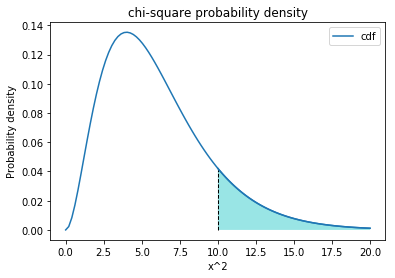

In [8]:
from scipy.stats import chi2
center = 0; sigma = 1
df = 6
# z_pos = 1.0
# Imput step number
z_pos = float(input("x value: "))
x1 = np.linspace(0, 20, 100)
y1 = chi2.pdf(x1, df, loc=center, scale=sigma)
x2 = np.linspace(z_pos, 20, 100)
y2 = chi2.pdf(x2, df, loc=center, scale=sigma)

plt.title("chi-square probability density")
plt.xlabel("x^2")
plt.ylabel("Probability density")
plt.plot(x1, y1, color="#1f77b4", label="cdf")
plt.plot(x2, y2, color="#1f77b4")
plt.fill_between(x2, 0, y2, facecolor='c', alpha=0.4)
plt.vlines(x=z_pos, ymin=0, ymax=chi2.pdf(z_pos,df, loc=center,scale=sigma),
           linestyles='dashed', linewidths=1)
plt.legend()

# 累積分布関数：Cumulative distribution function (cdf)
print("累積値: ",chi2.sf(z_pos, df, loc=0, scale=1))

In [9]:
# chi-square分布表の生成
# 自由度を設定
df = 9

alpha = [0.995, 0.975, 0.95, 0.9, 0.5, 0.25, 0.01, 0.005]
for k in alpha:
    print(f"{k:5.3f}  {chi2.isf(k, df, loc=0, scale=1):6.2f}")

0.995    1.73
0.975    2.70
0.950    3.33
0.900    4.17
0.500    8.34
0.250   11.39
0.010   21.67
0.005   23.59
